# Melanoma Detection Assignment

**In this assignment, you will build a multiclass classification model using a custom convolutional neural network in TensorFlow.**

**Problem statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Activation, Dense, Dropout, Flatten, BatchNormalization

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2243
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = data_dir_train,
    labels = 'inferred',
    subset = 'training',
    image_size = (img_height, img_width),
    validation_split = 0.2,
    seed = 123,
    shuffle = True,
    batch_size = batch_size,
    )

Found 2243 files belonging to 9 classes.
Using 1795 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = data_dir_train,
    labels = 'inferred',
    subset = 'validation',
    image_size = (img_height, img_width),
    validation_split = 0.2,
    seed = 123,
    shuffle = True,
    batch_size = batch_size,
    )

Found 2243 files belonging to 9 classes.
Using 448 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

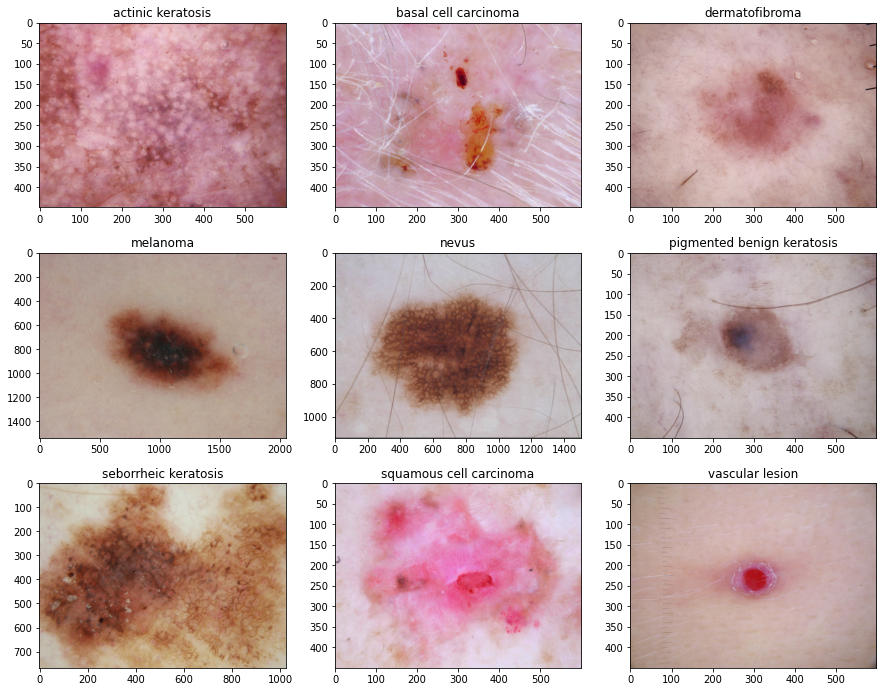

In [9]:
import matplotlib.pyplot as plt
from glob import glob

### your code goes here, you can use training or validation data to visualize
fig = plt.figure(figsize = (15, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(glob(os.path.join(data_dir_train, class_names[i], '*.jpg'))[1])
    plt.title(class_names[i])
    plt.imshow(img)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
#checking the number of classes
num_classes = len(class_names)
print(num_classes)

9


In [12]:
### Your code goes here

#creating a model and normalizing RGB values between 0 and 1.
model = Sequential(layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)))

#First Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "Same", activation = "relu", input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))

#Second Convolutional Layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))

#Third Convolutional Layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))

#Forth Convolutional Layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

#Output Layer
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        9248      
                                                        

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 40s 183ms/step - loss: 2.0674 - accuracy: 0.1989 - val_loss: 2.0216 - val_accuracy: 0.1875
Epoch 2/20
57/57 [==============================] - 6s 111ms/step - loss: 2.0169 - accuracy: 0.2446 - val_loss: 2.1035 - val_accuracy: 0.2054
Epoch 3/20
57/57 [==============================] - 6s 109ms/step - loss: 2.0466 - accuracy: 0.1900 - val_loss: 2.0418 - val_accuracy: 0.2054
Epoch 4/20
57/57 [==============================] - 6s 110ms/step - loss: 2.0263 - accuracy: 0.1905 - val_loss: 2.0421 - val_accuracy: 0.2054
Epoch 5/20
57/57 [==============================] - 6s 111ms/step - loss: 2.0014 - accuracy: 0.2223 - val_loss: 1.9013 - val_accuracy: 0.3080
Epoch 6/20
57/57 [==============================] - 6s 111ms/step - loss: 1.8288 - accuracy: 0.3175 - val_loss: 1.8061 - val_accuracy: 0.3504
Epoch 7/20
57/57 [==============================] - 6s 112ms/step - loss: 1.7434 - accuracy: 0.3493 - val_loss: 1.6803 - val_accuracy: 0.3929
Epoch 8/20
57/57

### Visualizing training results

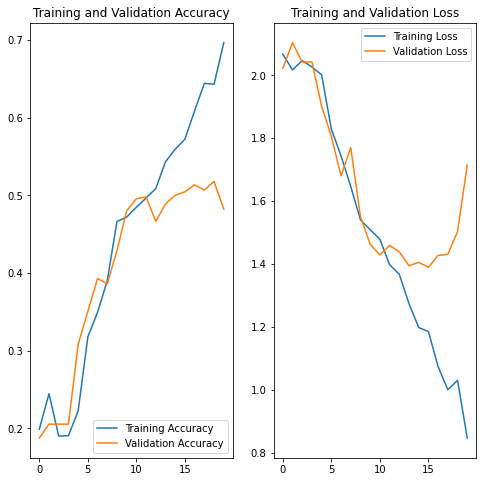

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observation**:
1. Training accuracy is gradually increasing and loss is gradually decreasing but after 12 epochs the validation accuracy starts shifting away from training accuracy leading overfitting.
2. From the accuracy and loss, we can see the model is clearly overfitting. After the 12th epoch, model is trying to remember the pattern instead of learning the pattern.
3. We can add more data with data augmentation, so with more data model will not tend to overfit.

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_aug = tf.keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip(mode='horizontal'), 
     layers.experimental.preprocessing.RandomRotation(0.25), 
     layers.experimental.preprocessing.RandomZoom(0.2)
     ]
  )

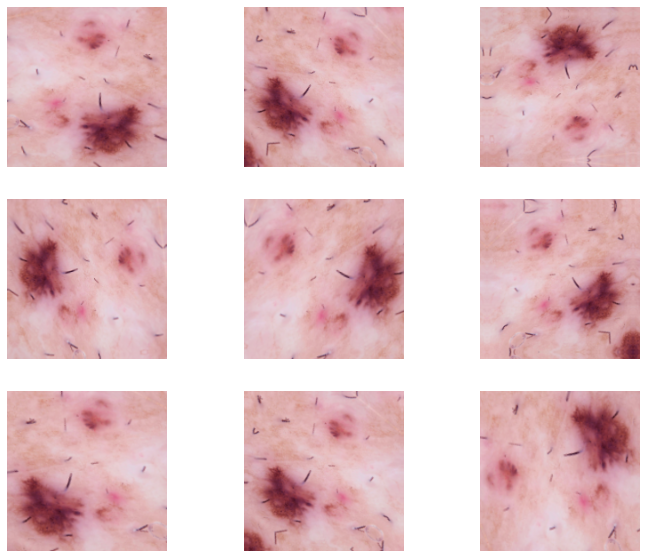

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
fig = plt.figure(figsize = (12, 10))

for img, label in train_ds.take(1):
    for i in range(9):
        aug_imgs = data_aug(img)
        plt.subplot(3, 3, i+1)
        plt.imshow(aug_imgs[0].numpy().astype('uint8'))
        plt.axis("off")
      

### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
#creating a model and normalizing RGB values between 0 and 1.
model = Sequential([data_aug, layers.experimental.preprocessing.Rescaling(1./255)])

#First Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))

#Second Convolutional Layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))

#Third Convolutional Layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))

#Forth Convolutional Layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))

#Output Layer
model.add(Dense(num_classes, activation = "softmax"))


### Compiling the model

In [20]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 9s 122ms/step - loss: 2.0553 - accuracy: 0.2045 - val_loss: 2.0459 - val_accuracy: 0.1875
Epoch 2/20
57/57 [==============================] - 7s 116ms/step - loss: 2.0179 - accuracy: 0.2067 - val_loss: 2.0588 - val_accuracy: 0.2054
Epoch 3/20
57/57 [==============================] - 7s 115ms/step - loss: 2.0242 - accuracy: 0.2173 - val_loss: 2.0174 - val_accuracy: 0.1875
Epoch 4/20
57/57 [==============================] - 7s 117ms/step - loss: 1.9819 - accuracy: 0.2368 - val_loss: 1.9309 - val_accuracy: 0.1875
Epoch 5/20
57/57 [==============================] - 7s 116ms/step - loss: 1.8971 - accuracy: 0.2730 - val_loss: 1.8481 - val_accuracy: 0.3125
Epoch 6/20
57/57 [==============================] - 7s 117ms/step - loss: 1.8451 - accuracy: 0.3075 - val_loss: 1.7990 - val_accuracy: 0.3281
Epoch 7/20
57/57 [==============================] - 7s 115ms/step - loss: 1.7859 - accuracy: 0.3304 - val_loss: 1.7730 - val_accuracy: 0.3036
Epoch 8/20
57/57 

### Visualizing the results

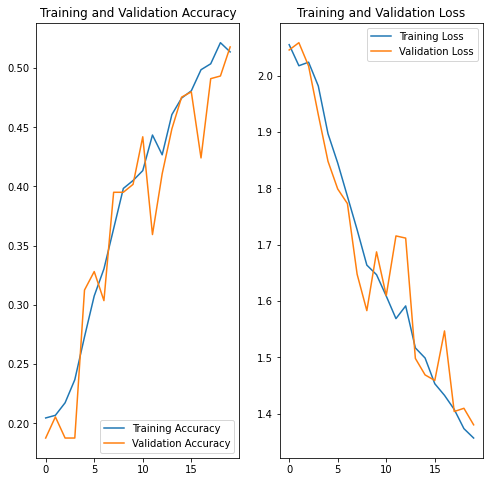

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observation**:
1. The model is not overfitting after data augmentation and adding extra Dropout layer.
2. But the accuracy of the model is decreased.

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

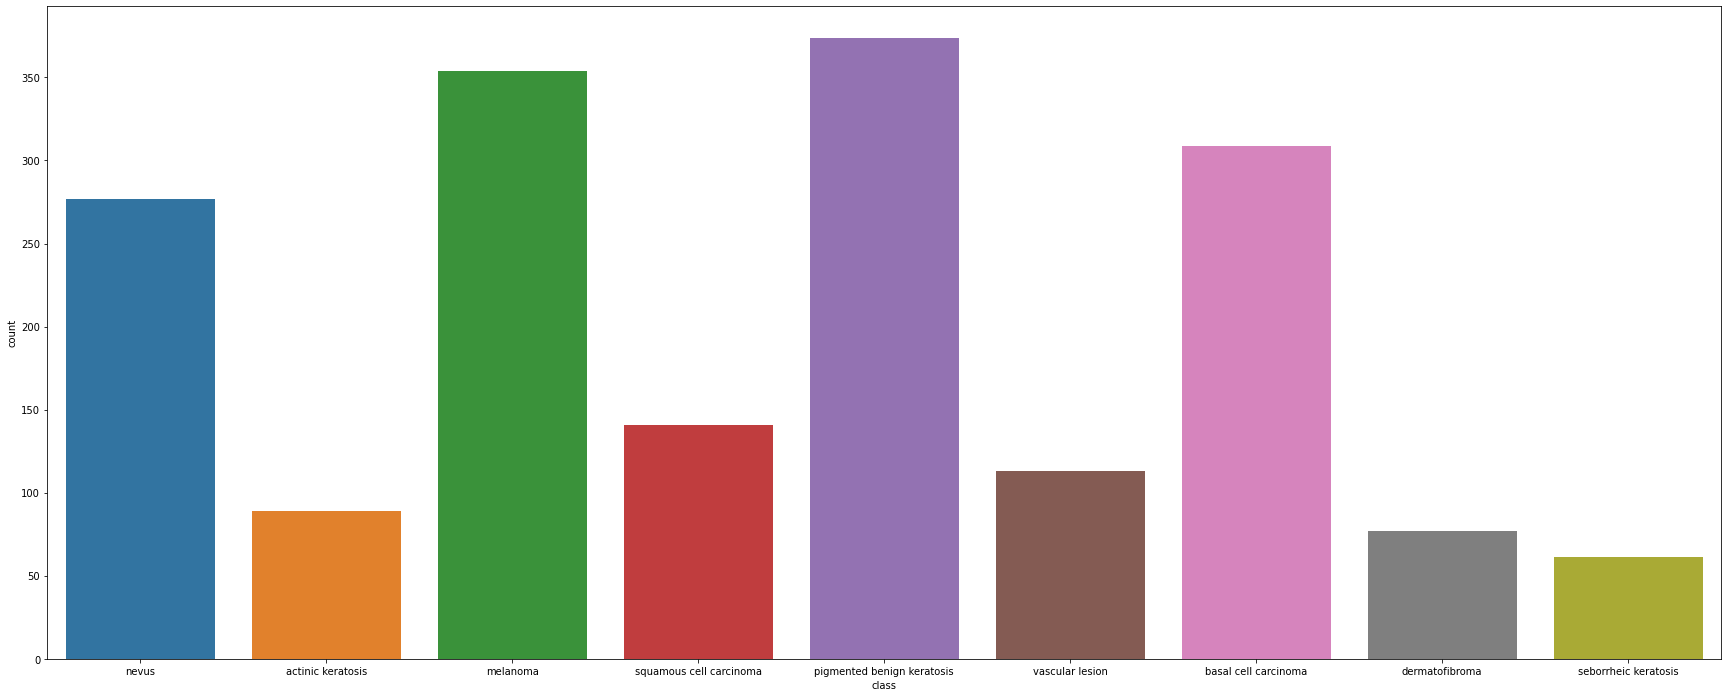

In [23]:
## Your code goes here
import seaborn as sns

class_counts = list(np.concatenate([count for label, count in train_ds]))
unique_class_counts = {class_names[i] : class_counts.count(i) for i in list(class_counts)}

data = pd.DataFrame(unique_class_counts.items(), columns = ['class', 'count'])
plt.figure(figsize=(30, 12))
sns.barplot(x="class", y="count", data=data)
plt.show()

In [24]:
data

,class,count
0,nevus,277
1,actinic keratosis,89
2,melanoma,354
3,squamous cell carcinoma,141
4,pigmented benign keratosis,374
5,vascular lesion,113
6,basal cell carcinoma,309
7,dermatofibroma,77
8,seborrheic keratosis,61


### **Observation**: 
#### - Which class has the least number of samples?
## **Seborrheic keratosis**
#### - Which classes dominate the data in terms proportionate number of samples?
## **Pigmented benign keratosis**

#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(path_list)
lesion_list = [os.path.basename(os.path.dirname(y)) for y in data_dir_train.glob(os.path.join('*', '*.jpg'))]
print(len(path_list), len(lesion_list))
df_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(df_dict_original.items(), columns = ['Path', 'Label'])
original_df.count

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025780.jpg', '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025953.jpg', '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025825.jpg', '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025803.jpg', '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025957.jpg', '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025992.jpg', '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026149.jpg', '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Tr

<bound method DataFrame.count of                                                    Path              Label
0     /content/gdrive/MyDrive/Skin cancer ISIC The I...  actinic keratosis
1     /content/gdrive/MyDrive/Skin cancer ISIC The I...  actinic keratosis
2     /content/gdrive/MyDrive/Skin cancer ISIC The I...  actinic keratosis
3     /content/gdrive/MyDrive/Skin cancer ISIC The I...  actinic keratosis
4     /content/gdrive/MyDrive/Skin cancer ISIC The I...  actinic keratosis
...                                                 ...                ...
2238  /content/gdrive/MyDrive/Skin cancer ISIC The I...    vascular lesion
2239  /content/gdrive/MyDrive/Skin cancer ISIC The I...    vascular lesion
2240  /content/gdrive/MyDrive/Skin cancer ISIC The I...    vascular lesion
2241  /content/gdrive/MyDrive/Skin cancer ISIC The I...    vascular lesion
2242  /content/gdrive/MyDrive/Skin cancer ISIC The I...    vascular lesion

[2243 rows x 2 columns]>

In [27]:
path_to_training_dataset = '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9D7B4DBE50>: 100%|██████████| 500/500 [00:23<00:00, 21.25 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9D7B5291D0>: 100%|██████████| 500/500 [00:25<00:00, 19.47 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9D7BB635D0>: 100%|██████████| 500/500 [00:27<00:00, 18.42 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1936x1936 at 0x7F9D7CC53C50>: 100%|██████████| 500/500 [01:43<00:00,  4.85 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9D7B43CA90>: 100%|██████████| 500/500 [01:50<00:00,  4.53 Samples/s]


Initialised with 466 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9D7BA41790>: 100%|██████████| 500/500 [00:22<00:00, 22.15 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F9D7B43CF50>: 100%|██████████| 500/500 [00:49<00:00, 10.09 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9D7BB89E50>: 100%|██████████| 500/500 [00:21<00:00, 22.80 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9D7B43D690>: 100%|██████████| 500/500 [00:22<00:00, 22.57 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032437.jpg_e35c9108-055a-4130-96a4-3aae90212e01.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029781.jpg_bbae0fee-132b-480b-ae97-64f0ae39b645.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027334.jpg_aafd7696-106d-456c-958e-f2be99762c5a.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026729.jpg_f0ea0be1-a67b-425f-afd7-3d978376e974.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027562.jpg_83bb6dac-7555

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [31]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [33]:
new_df['Label'].value_counts()

pigmented benign keratosis    966
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### Creating a training dataset

In [35]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6743 files belonging to 9 classes.
Using 5395 files for training.


#### Creating a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6743 files belonging to 9 classes.
Using 1348 files for validation.


#### Creating the model

In [46]:
## your code goes here
#creating a model and normalizing RGB values between 0 and 1.
model = Sequential([data_aug, layers.experimental.preprocessing.Rescaling(1./255)])

#First Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(BatchNormalization())

#Second Convolutional Layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(BatchNormalization())

#Third Convolutional Layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(BatchNormalization())

#Forth Convolutional Layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))

#Output Layer
model.add(Dense(num_classes, activation = "softmax"))

#### Compiling the model

In [47]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

#### Training the model

In [48]:
epochs = 35
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/35


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 48s 265ms/step - loss: 1.8351 - accuracy: 0.3424 - val_loss: 2.4953 - val_accuracy: 0.0861
Epoch 2/35
169/169 [==============================] - 55s 319ms/step - loss: 1.4842 - accuracy: 0.4360 - val_loss: 2.9207 - val_accuracy: 0.1617
Epoch 3/35
169/169 [==============================] - 49s 283ms/step - loss: 1.4173 - accuracy: 0.4589 - val_loss: 1.9007 - val_accuracy: 0.3724
Epoch 4/35
169/169 [==============================] - 51s 293ms/step - loss: 1.3566 - accuracy: 0.4884 - val_loss: 2.6144 - val_accuracy: 0.2619
Epoch 5/35
169/169 [==============================] - 49s 282ms/step - loss: 1.3034 - accuracy: 0.5110 - val_loss: 1.2994 - val_accuracy: 0.5045
Epoch 6/35
169/169 [==============================] - 52s 298ms/step - loss: 1.2909 - accuracy: 0.5021 - val_loss: 6.4647 - val_accuracy: 0.1350
Epoch 7/35
169/169 [==============================] - 50s 289ms/step - loss: 1.2211 - accuracy: 0.5325 - val_loss: 2.6593 - val_accuracy: 0.3

#### Visualizing the model results

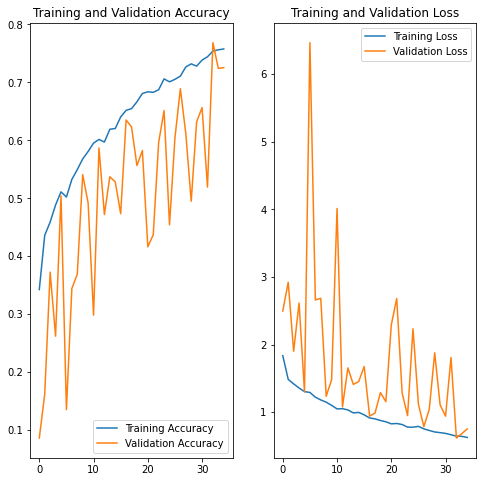

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



**Observations**:
1. The accuracy is increased by **around 20%** and the loss is also gradually decreased.
2. Training Accuracy : 0.7577 <br>
   Validation Accuracy : 0.7255 <br>
   Training Loss : 0.6256 <br>
   Validation Loss : 0.7513 <br>
3. The model is not overfitting anymore after using more data to resolve the issue of class imbalance, a dropout layer and extra epoch(35).
4. To further increase the accuracy, we can tune the model further, add extra layers and increase the epochs.